In [ ]:
!pip install wordcloud
!pip install imbalanced-learn
!pip install vaderSentiment

# Collab
# !pip install nltk

#Kaggle
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr

# Import Library

In [ ]:
import pandas as pd
import time
import re
import nltk
import string
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding, BatchNormalization, Dropout, MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Check GPU
print('GPU information:', tf.config.list_physical_devices('GPU'))
print('GPU status: ', tf.test.is_gpu_available())
print('GPU testing: ', tf.reduce_sum(tf.random.normal([1000, 1000])))

GPU information: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU status:  True
GPU testing:  tf.Tensor(-1661.2144, shape=(), dtype=float32)


# Read Data

In [ ]:
df = pd.read_csv('/kaggle/input/google-play-review-genshin-impact/dataset_raw.csv')

In [ ]:
df = df[['reviewId', 'content', 'score']]
df.rename(columns={'reviewId': 'review_id', 'content': 'review'}, inplace=True)

df.head()

,review_id,review,score
0,25e93607-7892-4174-ae2a-089c611d6f36,"Played it a bit last year (2023) when I had the storage for it, but I ended up not having the time to load it so I stopped for a bit. Recently tried getting back into it because I remember really loving the storyline that was building up in the beginning, and decided to give it another go. It takes WAY too much storage and still takes forever to load. I really wanna continue playing, but the cloud version has a time limit so it's a tad off putting. Pretty disappointed... Still nice storyline tho",2
1,4486c975-c023-4c3a-aae9-e09e8a4219b8,"Dialogue simulator: the endless experience. The combat is pretty good and interesting, but you cannot skip dialogue, and meaningless 'choices' are required to be input on occasion, meaning you can't just let it happen. There is so much dialogue, even for small minor unimportant stuff.",2
2,712ed33c-ef5f-4bb5-b510-462cd07c7a48,"I love this game so much but I will admit it takes up alot of space and has trouble with lagging and loading but that's only if you play it on your phone so I recommend playing on a gaming console. The art style and animation is beautiful and looks like it took alot of time and effort to make. The stories and quests are really fun. And I find it fun to try and work hard to get characters , it's very rewarding. Also make sure you get a lyre to play because it sounds so pretty.",5
3,c294f5ac-0005-45a2-86f4-edfe0cb6dd1b,"Amazing game. It's beautiful, the character design is amazing, and there's so much to do. That being said, I have had some recent issues with the game crashing, often when I'm not doing anything I'd think would make it crash. It's crashed when I'm just wandering around, in the middle of dialog, and once right after I had completed a domain, forcing me to redo it. I used the compatibility mode so it would run smoother, but that didn't help with it crashing.",4
4,e5384431-56f9-43fa-a32a-53296afc7f66,"While I've reviewed this before, I decided to edit my response to my current opinion. The game is great, the graphics are stunning, and the stories are nice. However, it's very long and excessive. It makes it feel more like a chore. As you get more into the end game, getting rewards is a struggle, and farming and upgrading characters is more of a hassle than it should be. The resin (energy) cap should be upgraded, or costs of energy should be lowered. This game is very good, just time consuming.",3


# Pre-Cleaning EDA (Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  99000 non-null  object
 1   review     98998 non-null  object
 2   score      99000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
print('Total null/nan data:')
df.isna().sum()

Total null/nan data:


review_id    0
review       2
score        0
dtype: int64

In [ ]:
print('Total duplicated data:', df.duplicated().sum())

Total duplicated data: 0


In [ ]:
df.describe()

,score
count,99000.000000
mean,3.592394
std,1.618147
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98998 entries, 0 to 98999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  98998 non-null  object
 1   review     98998 non-null  object
 2   score      98998 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
review_score = df.groupby("score").review_id.nunique().sort_values(ascending=False).reset_index()

fig = px.pie(review_score, values="review_id", names="score", title="Review Scores")
fig.show()

In [ ]:
word_freq = Counter(' '.join(df['review']).lower().split())

most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

fig = go.Figure([go.Bar(x=words, y=counts)])
fig.update_layout(
    title="10 Most COmmon Words",
    xaxis_title="Words",
    yaxis_title="Frequency",
    template="plotly_white"
)

fig.show()

# Pre-Process Text

In [ ]:
def tokenize(text):
    return word_tokenize(text)

def case_folding(text):
    return text.lower()

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.replace('\n', ' ')
    text = text.strip(' ')
    return text

contraction_map = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "can not",
    "cant": "can not",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "dont": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd've": "how did have",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "shall'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "will't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "would't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you have all",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}
def handle_contractions(text, contraction_map):
    pattern = re.compile('({})'.format('|'.join(contraction_map.keys())), flags=re.IGNORECASE|re.DOTALL)

    def expand_map(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expansion = contraction_map.get(match) if contraction_map.get(match) else contraction_map.get(match.lower())
        expansion = first_char + expansion[1:]
        return expansion
    expand_text = pattern.sub(expand_map, text)
    return expand_text


def get_antonym(word):
    word_antonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                word_antonyms.add(antonym.name())

    if len(word_antonyms) != 0:
        return word_antonyms.pop()
    else:
        return None

def replace_negations(text):
    replaced_text = []
    index = 0
    tokenized_text = tokenize(text)
    token_length = len(tokenized_text)
    while index < token_length:
        current_word = tokenized_text[index]
        if (current_word == 'not' or current_word == 'no') and index+1 < token_length:
            current_antonym = get_antonym(tokenized_text[index+1])

            if current_antonym:
                replaced_text.append(current_antonym)
                index += 2
                continue

        replaced_text.append(current_word)
        index += 1

    replaced_text = ' '.join(replaced_text)
    return replaced_text

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    eng_stopwords = set(stopwords.words('english'))
    cleaned_text =  [word for word in tokenize(text) if word not in eng_stopwords]
    return ' '.join(cleaned_text)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lematized_text = [lemmatizer.lemmatize(word, get_pos_tag(word)) for word in tokenize(text)]
    lematized_text = [word for word in lematized_text if len(word) > 1]
    lematized_text = ' '.join(lematized_text)
    return lematized_text

def get_pos_tag(word):
    current_word_tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_map = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}

    return tag_map.get(current_word_tag, wordnet.NOUN)

In [ ]:
%%time

df['cleaned_review'] = df['review'].apply(case_folding)

df['cleaned_review'] = df['cleaned_review'].apply(clean_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: handle_contractions(x, contraction_map))

df['cleaned_review'] = df['cleaned_review'].apply(replace_negations)

df['cleaned_review'] = df['cleaned_review'].apply(remove_punctuation)

df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)

df['cleaned_review'] = df['cleaned_review'].apply(lemmatize)

CPU times: user 6min 14s, sys: 33.3 s, total: 6min 48s
Wall time: 6min 47s


In [ ]:
df.sample(10)

,review_id,review,score,cleaned_review
75598,3d817765-b9e6-44a0-9225-529e177d4f92,THE GAME IS SO AMAZING but the downloading is so long and when u don't play genshin impact for too long u have to download resources again..,5,game amaze download long tightness genshin impact long download resource
45656,27b7ad28-caf9-4c56-83ac-bde78bfaf9d5,"it's fun but it lags a lot on mobile and it takes a long time to download and load, the downloading took me 2 hours and then the game was super slow. i think many other players have similar issues too.",3,fun lag lot mobile take long time download load download take hour game super slow think many player similar issue
61653,6b87336f-e2d9-4f1d-a1e8-45871cc9273a,"honestly the best one out there. it's a very good RPG game. It has so many quests, activities and events! Deffinetly try this game out!",5,honestly best one good rpg game many quest activity event deffinetly try game
58570,aa32b84a-1b2d-4333-9483-a8719f88b6c6,"I LOVE THIS GAME!!! The graphics, characters, gameplay, story, and everything else is absolutely amazing :D",5,love game graphic character gameplay story everything else absolutely amaze
88081,a7209536-6c56-400a-bcc0-ece6623b86dc,"It does have alot of space to download it says it need 14. Blah blah GB, and it still says that it's still need more SPACEEEE",1,alot space download say need blah blah gb still say still need spaceeee
46834,111a198b-2905-4a75-9b75-952624cf5f79,The combat is compelling. The story is meh and both yakety-yak and cutscenes are unskipable. Android is denied controller support for no reason. Better played on PC.,3,combat compelling story meh yaketyyak cutscenes unskipable android deny controller support reason well played pc
14308,b093fcc5-1735-431c-8f12-5f01238f8523,"Very beautiful game, full of exploration and quests! The elemental system and swapping characters feels very smooth. The only thing I have trouble with is how intensive the game is on resources, even to mobile devices. This game may need an extra optimization step for the Western mobile sphere. (Western mobile devices are bad compared to the dedicated Eastern mobile customizations over there) Our phones are garbage. Anyway, great game! Highly recommend.",4,beautiful game full exploration quest elemental system swap character feel smooth thing trouble intensive game resource even mobile device game may need extra optimization step western mobile sphere western mobile device bad compare dedicate eastern mobile customizations phone garbage anyway great game highly recommend
20216,ef1b8b0d-d5c5-4f34-8847-9bc55cdeca72,Can't log in using PC account. Game has serious investment and potential but they need to fix cross play login issues and account creation is really clunky. Hence my 1 star. They need to fix core game access and performance issues. Go play on PC for now come back to Android once they fix their issues,1,log use pc account game serious investment potential need fix cross play login issue account creation really clunky hence star need fix core game access performance issue go play pc come back android fix issue
48649,ea393663-9c2d-4dd4-bee7-484032c92174,"I have already downloaded all 5gb data when I first started then after the update today , when I open the game , the game is redownloading the already existed 5gb file and I don't want to waste my data again. How can I fix this ?? Please , response",2,already download gb data first start update today open game game redownloading already exist gb file want waste data fix please response
64080,30ea8043-34ee-4c8c-b6f0-a6b49b6e54ec,Love this game had to reset phone for some reason just to see the 2.0 update. Operating system is acting weird.,5,love game reset phone reason see update operating system act weird


# Label Sentiment


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_label(review):
    vs = analyzer.polarity_scores(review)

    if vs['compound'] >= 0.05:
        return 'positive'

    if vs['compound'] <= -0.05:
        return 'negative'

    return 'neutral'

In [ ]:
%%time

df['sentiment'] = df['review'].apply(get_sentiment_label)

CPU times: user 34.3 s, sys: 14.9 ms, total: 34.3 s
Wall time: 34.3 s


In [ ]:
df.head()

,review_id,review,score,cleaned_review,sentiment
0,25e93607-7892-4174-ae2a-089c611d6f36,"Played it a bit last year (2023) when I had the storage for it, but I ended up not having the time to load it so I stopped for a bit. Recently tried getting back into it because I remember really loving the storyline that was building up in the beginning, and decided to give it another go. It takes WAY too much storage and still takes forever to load. I really wanna continue playing, but the cloud version has a time limit so it's a tad off putting. Pretty disappointed... Still nice storyline tho",2,played bit last year storage end abstain time load stop bit recently try get back bececause remember really love storyline building begin decide give another go take way much storage still take forever load really wan na continue play cloud version time limit tad put pretty disappointed still nice storyline tho,positive
1,4486c975-c023-4c3a-aae9-e09e8a4219b8,"Dialogue simulator: the endless experience. The combat is pretty good and interesting, but you cannot skip dialogue, and meaningless 'choices' are required to be input on occasion, meaning you can't just let it happen. There is so much dialogue, even for small minor unimportant stuff.",2,dialogue simulator endless experience combat pretty good interest skip dialogue meaningless choice require input occasion meaning inequitable let happen much dialogue even small minor unimportant stuff,negative
2,712ed33c-ef5f-4bb5-b510-462cd07c7a48,"I love this game so much but I will admit it takes up alot of space and has trouble with lagging and loading but that's only if you play it on your phone so I recommend playing on a gaming console. The art style and animation is beautiful and looks like it took alot of time and effort to make. The stories and quests are really fun. And I find it fun to try and work hard to get characters , it's very rewarding. Also make sure you get a lyre to play because it sounds so pretty.",5,love game much admit take alot space trouble lag load play phone recommend play game console art style animation beautiful look like take alot time effort make story quest really fun find fun try work hard get character reward also make sure get lyre play bececause sound pretty,positive
3,c294f5ac-0005-45a2-86f4-edfe0cb6dd1b,"Amazing game. It's beautiful, the character design is amazing, and there's so much to do. That being said, I have had some recent issues with the game crashing, often when I'm not doing anything I'd think would make it crash. It's crashed when I'm just wandering around, in the middle of dialog, and once right after I had completed a domain, forcing me to redo it. I used the compatibility mode so it would run smoother, but that didn't help with it crashing.",4,amaze game beautiful character design amaze much say recent issue game crash often unmake anything would think would make crash crashed wander around middle dialog right complete domain force redo use compatibility mode would run smoother help crash,positive
4,e5384431-56f9-43fa-a32a-53296afc7f66,"While I've reviewed this before, I decided to edit my response to my current opinion. The game is great, the graphics are stunning, and the stories are nice. However, it's very long and excessive. It makes it feel more like a chore. As you get more into the end game, getting rewards is a struggle, and farming and upgrading characters is more of a hassle than it should be. The resin (energy) cap should be upgraded, or costs of energy should be lowered. This game is very good, just time consuming.",3,review decide edit response current opinion game great graphic stun story nice however long excessive make feel like chore get end game get reward struggle farm upgrade character hassle resin energy cap upgraded cost energy lower game good time consume,positive


In [ ]:
df.groupby("sentiment").review_id.count().sort_values(ascending=False).reset_index()

,sentiment,review_id
0,positive,77334
1,negative,18760
2,neutral,2904


# Post Cleaning EDA (Exploratory Data Analysis)

In [ ]:
word_freq = Counter(' '.join(df['cleaned_review']).lower().split())

most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

fig = go.Figure([go.Bar(x=words, y=counts)])
fig.update_layout(
    title="10 Most COmmon Words",
    xaxis_title="Words",
    yaxis_title="Frequency",
    template="plotly_white"
)

fig.show()

In [ ]:
sentiment_portion = df.groupby("sentiment").review_id.count().sort_values(ascending=False).reset_index()

fig = px.histogram(sentiment_portion, x="sentiment", y="review_id",
             color='sentiment',
             height=500, title="Sentiment Portion")

fig.update_layout(
    xaxis_title="Sentiment",
    yaxis_title="Total"
)

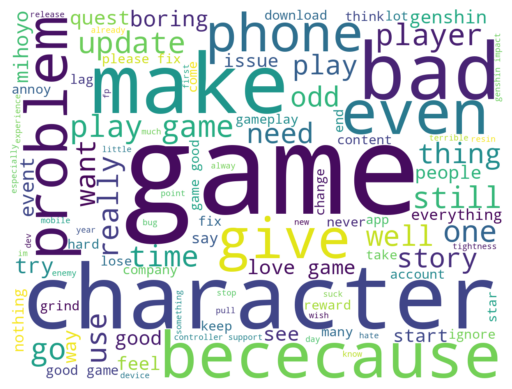

In [ ]:
negative_corpus = ' '.join(text for text in df[df['sentiment'] == 'negative']['cleaned_review'].values)

wordcloud = WordCloud(width=1200,
                      height=900,
                      max_words=100,
                      collocations = True,
                      background_color='white')
plt.imshow(wordcloud.generate(negative_corpus), interpolation='bilinear')
plt.axis('off')
plt.show()

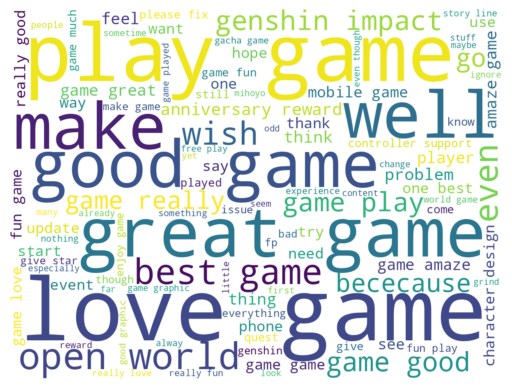

In [ ]:
positive_corpus = ' '.join(text for text in df[df['sentiment'] == 'positive']['cleaned_review'].values)

wordcloud = WordCloud(width=1200,
                      height=900,
                      max_words=100,
                      collocations = True,
                      background_color='white')
plt.imshow(wordcloud.generate(positive_corpus), interpolation='bilinear')
plt.axis('off')
plt.show()

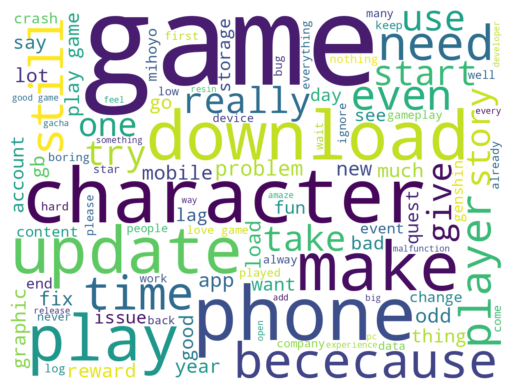

In [ ]:
neutral_corpus = ' '.join(text for text in df[df['sentiment'] == 'neutral']['cleaned_review'].values)

wordcloud = WordCloud(width=1200,
                      height=900,
                      max_words=100,
                      collocations = True,
                      background_color='white')
plt.imshow(wordcloud.generate(neutral_corpus), interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction: TF-IDF, Vectorizer, Tokenizer

## TF-IDF

In [ ]:
def build_tfidf(x_train, x_test):
    tfidf = TfidfVectorizer(max_features=150)
    tfidf.fit(x_train)

    x_train = tfidf.transform(x_train)
    x_train = pd.DataFrame(x_train.toarray(), columns=tfidf.get_feature_names_out())
    x_train = x_train.astype(np.float32)

    x_test = tfidf.transform(x_test)
    x_test = pd.DataFrame(x_test.toarray(), columns=tfidf.get_feature_names_out())
    x_test = x_test.astype(np.float32)

    print('Train set TF-IDF shape: ', x_train.shape)
    print('Test set TF-IDF shape: ', x_test.shape)

    return x_train.values, x_test.values

## Tokenizer Padding

In [ ]:
def build_token(x):
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(x)
    print('Total unique vocab: ', len(tokenizer.word_index) + 1)
    return tokenizer

def build_text_sequences(x, tokenizer):
    x_sequences = tokenizer.texts_to_sequences(x)
    max_len = max(len(token) for token in x_sequences)
    print('Maximum sentences length: ', max_len)
    return x_sequences

def build_padding_sequences(x, max_len):
    x = pad_sequences(x, maxlen=max_len, padding='post')
    return x

# Label Encode

In [ ]:
def encode_class(y):
  encoder = LabelEncoder()
  y_encode = encoder.fit_transform(y)
  return y_encode

def one_hot_encode(y):
  one_hot_y = to_categorical(y)
  return one_hot_y

# Re-Sampling Imbalanced Data

In [ ]:
def resampling(x, y):
    print('Before re-sampling: ', Counter(y))

    over_sampler = RandomOverSampler(random_state=42)
    x_resample, y_resample = over_sampler.fit_resample(x, y)

    print('After re-sampling: ', Counter(y_resample))
    return x_resample, y_resample

In [ ]:
x = df[['review_id', 'cleaned_review']]
y = df['sentiment']

x_resample, y_resample = resampling(x, y)
x_resample = x_resample['cleaned_review']

Before re-sampling:  Counter({'positive': 77334, 'negative': 18760, 'neutral': 2904})
After re-sampling:  Counter({'positive': 77334, 'negative': 77334, 'neutral': 77334})


# Train Test Split

In [ ]:
def build_train_test(x, y, rate):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=rate, stratify=y, shuffle=True, random_state=42)
  return x_train, x_test, y_train, y_test

# Variation 1: TF-IDF + Neural Network + 80/20

## Prepare X & Y Neural Network

In [ ]:
x_nn_resample = x_resample
y_nn_resample = y_resample

In [ ]:
x_nn_train, x_nn_test, y_nn_train, y_nn_test = build_train_test(x_nn_resample, y_nn_resample, 0.2)

print('X train size: ', x_nn_train.shape)
print('Y train size: ', y_nn_train.shape)
print('X test size: ', x_nn_test.shape)
print('Y test size: ', y_nn_test.shape)

X train size:  (185601,)
Y train size:  (185601,)
X test size:  (46401,)
Y test size:  (46401,)


In [ ]:
x_nn_train, x_nn_test = build_tfidf(x_nn_train, x_nn_test)

Train set TF-IDF shape:  (185601, 150)
Test set TF-IDF shape:  (46401, 150)


In [ ]:
y_nn_train = one_hot_encode(encode_class(y_nn_train))
y_nn_test = one_hot_encode(encode_class(y_nn_test))

print('Y train shape: ', y_nn_train.shape)
print('Y test shape: ', y_nn_test.shape)

Y train shape:  (185601, 3)
Y test shape:  (46401, 3)


In [ ]:
x_nn_train = np.asarray(x_nn_train)
x_nn_test = np.asarray(x_nn_test)

y_nn_train = np.asarray(y_nn_train)
y_nn_test = np.asarray(y_nn_test)

print('X train shape: ', x_nn_train.shape)
print('Y train shape: ', y_nn_train.shape)
print('X test shape: ', x_nn_test.shape)
print('Y test shape: ', y_nn_test.shape)

X train shape:  (185601, 150)
Y train shape:  (185601, 3)
X test shape:  (46401, 150)
Y test shape:  (46401, 3)


## Model Building & Training Neural Network

In [ ]:
nn_model = Sequential()
nn_model.add(Input(shape=(x_nn_train.shape[1],)))
nn_model.add(Dense(256, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=3, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          38,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,003 (312.51 KB)

 Trainable params: 80,003 (312.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time

nn_history = nn_model.fit(x=x_nn_train, y=y_nn_train, epochs=50, batch_size=256, validation_data=(x_nn_test, y_nn_test), verbose=1)

Epoch 1/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6021 - loss: 0.8598 - val_accuracy: 0.7410 - val_loss: 0.6327
Epoch 2/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7493 - loss: 0.6115 - val_accuracy: 0.8175 - val_loss: 0.4585
Epoch 3/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.4929 - val_accuracy: 0.8466 - val_loss: 0.3812
Epoch 4/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.4287 - val_accuracy: 0.8520 - val_loss: 0.3597
Epoch 5/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8382 - loss: 0.3996 - val_accuracy: 0.8555 - val_loss: 0.3460
Epoch 6/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8461 - loss: 0.3790 - val_accuracy: 0.8596 - val_loss: 0.3340
Epoch 7/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.3671 - val_accuracy: 0.8641 - val_loss: 0.3249
Epoch 8/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3513 - val_accuracy: 0.

## Performance Visualization Neural Network

In [ ]:
nn_acc = nn_history.history['accuracy']
nn_val_acc = nn_history.history['val_accuracy']

df_nn_acc = pd.DataFrame({
    'epochs': list(range(1, len(nn_acc) + 1)),
    'accuracy': nn_acc,
    'val_accuracy': nn_val_acc
})

df_nn_acc_melt = df_nn_acc.melt(id_vars='epochs', value_vars=['accuracy', 'val_accuracy'], var_name='metric', value_name='value')

fig = px.line(df_nn_acc_melt, x='epochs', y='value', color='metric', title='Training Accuracy vs Validation Accuracy', labels={'epochs': 'Epochs', 'value': 'Accuracy'})
fig.show()

In [ ]:
nn_loss = nn_history.history['loss']
nn_val_loss = nn_history.history['val_loss']

df_nn_loss = pd.DataFrame({
    'epochs': list(range(1, len(nn_loss) + 1)),
    'loss': nn_loss,
    'val_loss': nn_val_loss
})

df_nn_loss_melt = df_nn_loss.melt(id_vars='epochs', value_vars=['loss', 'val_loss'], var_name='metric', value_name='value')

fig = px.line(df_nn_loss_melt, x='epochs', y='value', color='metric', title='Training Loss vs Validation Loss', labels={'epochs': 'Epochs', 'value': 'Loss'})
fig.show()

## Model Evaluation Neural Network

In [ ]:
score = nn_model.evaluate(x_nn_test, y_nn_test, verbose=1)

print('Akurasi testing: ', score[1])
print('Loss testing: ', score[0])

1451/1451 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9215 - loss: 0.2177
Akurasi testing:  0.920626699924469
Loss testing:  0.2182249128818512


In [ ]:
y_nn_pred = nn_model.predict(x_nn_test)

y_nn_pred_category = [np.argmax(i) for i in y_nn_pred]
y_nn_test_category = [np.argmax(i) for i in y_nn_test]

labels = ['Negative', 'Neutral', 'Positive']

print('Example y prediction: ', y_nn_pred_category[:5])
print('Example y test: ', y_nn_test_category[:5])
print('Performance report: \n', classification_report(y_nn_test_category, y_nn_pred_category, target_names=labels))

cm = confusion_matrix(y_nn_pred_category, y_nn_test_category)

fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=labels,
    y=labels,
    colorscale='Blues',
    colorbar=dict(title='Jumlah')
))

annotations = []
for i in range(len(labels)):
    for j in range(len(labels)):
        annotations.append(
            go.layout.Annotation(
                x=labels[j],
                y=labels[i],
                text=str(cm[i, j]),
                showarrow=False,
                font=dict(color='black' if cm[i, j] < cm.max() / 2 else 'white')
            )
        )

fig.update_layout(
    title='Confusion Matrix Sentiment Analysis',
    xaxis=dict(title='Prediction'),
    yaxis=dict(title='Actual'),
    annotations=annotations
)

fig.show()

1451/1451 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Example y prediction:  [1, 0, 0, 0, 1]
Example y test:  [1, 0, 0, 0, 1]
Performance report: 
               precision    recall  f1-score   support

    Negative       0.85      0.95      0.90     15467
     Neutral       0.97      1.00      0.98     15467
    Positive       0.95      0.82      0.88     15467

    accuracy                           0.92     46401
   macro avg       0.92      0.92      0.92     46401
weighted avg       0.92      0.92      0.92     46401



# Variation 2: Word Embedding + CNN + 90/10

## Prepare X & Y CNN

In [ ]:
x_cnn_resample = x_resample
y_cnn_resample = y_resample

In [ ]:
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = build_train_test(x_cnn_resample, y_cnn_resample, 0.1)

print('x train size: ', x_cnn_train.shape)
print('y train size: ', y_cnn_train.shape)
print('x test size: ', x_cnn_test.shape)
print('y test size: ', y_cnn_test.shape)

x train size:  (208801,)
y train size:  (208801,)
x test size:  (23201,)
y test size:  (23201,)


In [ ]:
print('Training x data sequences')
tokenizer = build_token(x_cnn_train)
x_cnn_train = build_text_sequences(x_cnn_train, tokenizer)

print('Testing x data sequences')
x_cnn_test = build_text_sequences(x_cnn_test, tokenizer)

Training x data sequences
Total unique vocab:  36983
Maximum sentences length:  356
Testing x data sequences
Maximum sentences length:  225


In [ ]:
x_cnn_train = build_padding_sequences(x_cnn_train, 360)
x_cnn_test = build_padding_sequences(x_cnn_test, 360)

In [ ]:
y_cnn_train = one_hot_encode(encode_class(y_cnn_train))
y_cnn_test = one_hot_encode(encode_class(y_cnn_test))

print('Y train shape: ', y_cnn_train.shape)
print('Y test shape: ', y_cnn_test.shape)

Y train shape:  (208801, 3)
Y test shape:  (23201, 3)


In [ ]:
total_vocab = len(tokenizer.word_index) + 1
max_len = 360
embedding_dim = 500

print('Embedding size: ', embedding_dim)
print('Total vocab: ', total_vocab)
print('Max Length: ', max_len)

Embedding size:  500
Total vocab:  36983
Max Length:  360


In [ ]:
x_cnn_train = np.asarray(x_cnn_train)
y_cnn_train = np.asarray(y_cnn_train)
x_cnn_test = np.asarray(x_cnn_test)
y_cnn_test = np.asarray(y_cnn_test)

print('X train shape: ', x_cnn_train.shape)
print('Y train shape: ', y_cnn_train.shape)
print('X test shape: ', x_cnn_test.shape)
print('Y test shape: ', y_cnn_test.shape)

X train shape:  (208801, 360)
Y train shape:  (208801, 3)
X test shape:  (23201, 360)
Y test shape:  (23201, 3)


## Model Building & Training CNN

In [ ]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(max_len,)))
cnn_model.add(Embedding(input_dim=total_vocab, output_dim=embedding_dim, trainable=False))
cnn_model.add(Conv1D(128, 5, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(128, 5, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(128, 5, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 360, 500)            │      18,491,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 360, 128)            │         320,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 72, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 72, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 72, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 14, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,017,071 (72.54 MB)

 Trainable params: 525,571 (2.00 MB)

 Non-trainable params: 18,491,500 (70.54 MB)

In [ ]:
%%time

cnn_history = cnn_model.fit(x=x_cnn_train, y=y_cnn_train, epochs=30, batch_size=256, validation_data=(x_cnn_test, y_cnn_test), verbose=1)

Epoch 1/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.5385 - loss: 0.9075 - val_accuracy: 0.8601 - val_loss: 0.3714
Epoch 2/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.8396 - loss: 0.4167 - val_accuracy: 0.8872 - val_loss: 0.2982
Epoch 3/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.8810 - loss: 0.3089 - val_accuracy: 0.9090 - val_loss: 0.2408
Epoch 4/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.8979 - loss: 0.2702 - val_accuracy: 0.9189 - val_loss: 0.2110
Epoch 5/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.9090 - loss: 0.2439 - val_accuracy: 0.9251 - val_loss: 0.1960
Epoch 6/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.9187 - loss: 0.2218 - val_accuracy: 0.9324 - val_loss: 0.1789
Epoch 7/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9240 - loss: 0.2079 - val_accuracy: 0.9367 - val_loss: 0.1691
Epoch 8/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9300 - loss: 0.1924 - 

## Performance Visualization CNN

In [ ]:
cnn_acc = cnn_history.history['accuracy']
cnn_val_acc = cnn_history.history['val_accuracy']

df_cnn_acc = pd.DataFrame({
    'epochs': list(range(1, len(cnn_acc) + 1)),
    'accuracy': cnn_acc,
    'val_accuracy': cnn_val_acc
})

df_cnn_acc_melt = df_cnn_acc.melt(id_vars='epochs', value_vars=['accuracy', 'val_accuracy'], var_name='metric', value_name='value')

fig = px.line(df_cnn_acc_melt, x='epochs', y='value', color='metric', title='Training Accuracy vs Validation Accuracy', labels={'epochs': 'Epochs', 'value': 'Accuracy'})
fig.show()

In [ ]:
cnn_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']

df_cnn_loss = pd.DataFrame({
    'epochs': list(range(1, len(cnn_loss) + 1)),
    'loss': cnn_loss,
    'val_loss': cnn_val_loss
})

df_cnn_loss_melt = df_cnn_loss.melt(id_vars='epochs', value_vars=['loss', 'val_loss'], var_name='metric', value_name='value')

fig = px.line(df_cnn_loss_melt, x='epochs', y='value', color='metric', title='Training Loss vs Validation Loss', labels={'epochs': 'Epochs', 'value': 'Loss'})
fig.show()

## Model Evaluation CNN

In [ ]:
score = cnn_model.evaluate(x_cnn_test, y_cnn_test, verbose=1)

print('Akurasi testing: ', score[1])
print('Loss testing: ', score[0])

726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9637 - loss: 0.1008
Akurasi testing:  0.9643549919128418
Loss testing:  0.10130846500396729


In [ ]:
y_cnn_pred = cnn_model.predict(x_cnn_test)

y_cnn_pred_category = [np.argmax(i) for i in y_cnn_pred]
y_cnn_test_category = [np.argmax(i) for i in y_cnn_test]

labels = ['Negative', 'Neutral', 'Positive']

print('Example y prediction: ', y_cnn_pred_category[:5])
print('Example y test: ', y_cnn_test_category[:5])
print('Performance report: \n', classification_report(y_cnn_test_category, y_cnn_pred_category, target_names=labels))

cm = confusion_matrix(y_cnn_pred_category, y_cnn_test_category)

fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=labels,
    y=labels,
    colorscale='Blues',
    colorbar=dict(title='Jumlah')
))

annotations = []
for i in range(len(labels)):
    for j in range(len(labels)):
        annotations.append(
            go.layout.Annotation(
                x=labels[j],
                y=labels[i],
                text=str(cm[i, j]),
                showarrow=False,
                font=dict(color='black' if cm[i, j] < cm.max() / 2 else 'white')
            )
        )

fig.update_layout(
    title='Confusion Matrix Sentiment Analysis',
    xaxis=dict(title='Prediction'),
    yaxis=dict(title='Actual'),
    annotations=annotations
)

fig.show()

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Example y prediction:  [0, 0, 1, 2, 0]
Example y test:  [0, 0, 1, 2, 0]
Performance report: 
               precision    recall  f1-score   support

    Negative       0.92      0.99      0.95      7733
     Neutral       0.99      1.00      0.99      7734
    Positive       0.99      0.90      0.94      7734

    accuracy                           0.96     23201
   macro avg       0.97      0.96      0.96     23201
weighted avg       0.97      0.96      0.96     23201



# Variation 3: Word Embedding + Bi-LSTM + 90/10

## Prepare X & Y Bi-LSTM

In [ ]:
x_lstm_resample = x_resample
y_lstm_resample = y_resample

In [ ]:
x_lstm_train, x_lstm_test, y_lstm_train, y_lstm_test = build_train_test(x_lstm_resample, y_lstm_resample, 0.1)

print('x train size: ', x_lstm_train.shape)
print('y train size: ', y_lstm_train.shape)
print('x test size: ', x_lstm_test.shape)
print('y test size: ', y_lstm_test.shape)

x train size:  (208801,)
y train size:  (208801,)
x test size:  (23201,)
y test size:  (23201,)


In [ ]:
print('Training x data sequences')
tokenizer = build_token(x_lstm_train)
x_lstm_train = build_text_sequences(x_lstm_train, tokenizer)

print('Testing x data sequences')
x_lstm_test = build_text_sequences(x_lstm_test, tokenizer)

Training x data sequences
Total unique vocab:  36983
Maximum sentences length:  356
Testing x data sequences
Maximum sentences length:  225


In [ ]:
x_lstm_train = build_padding_sequences(x_lstm_train, 360)
x_lstm_test = build_padding_sequences(x_lstm_test, 360)

In [ ]:
y_lstm_train = one_hot_encode(encode_class(y_lstm_train))
y_lstm_test = one_hot_encode(encode_class(y_lstm_test))

print('Y train shape: ', y_lstm_train.shape)
print('Y test shape: ', y_lstm_test.shape)

Y train shape:  (208801, 3)
Y test shape:  (23201, 3)


In [ ]:
total_vocab = len(tokenizer.word_index) + 1
max_len = 360
embedding_dim = 500

print('Embedding size: ', embedding_dim)
print('Total vocab: ', total_vocab)
print('Max Length: ', max_len)

Embedding size:  500
Total vocab:  36983
Max Length:  360


In [ ]:
x_lstm_train = np.asarray(x_lstm_train)
y_lstm_train = np.asarray(y_lstm_train)
x_lstm_test = np.asarray(x_lstm_test)
y_lstm_test = np.asarray(y_lstm_test)

print('X train shape: ', x_lstm_train.shape)
print('Y train shape: ', y_lstm_train.shape)
print('X test shape: ', x_lstm_test.shape)
print('Y test shape: ', y_lstm_test.shape)

X train shape:  (208801, 360)
Y train shape:  (208801, 3)
X test shape:  (23201, 360)
Y test shape:  (23201, 3)


## Model Building & Training Bi-LSTM

In [ ]:
lstm_model = Sequential()
lstm_model.add(Input(shape=(max_len,)))
lstm_model.add(Embedding(input_dim=total_vocab, output_dim=embedding_dim, trainable=False))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(units=3, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 360, 500)            │      18,491,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 256)                 │         644,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,152,239 (73.06 MB)

 Trainable params: 660,739 (2.52 MB)

 Non-trainable params: 18,491,500 (70.54 MB)

In [ ]:
%%time

lstm_history = lstm_model.fit(x=x_lstm_train, y=y_lstm_train, epochs=30, batch_size=1024, validation_data=(x_lstm_test, y_lstm_test), verbose=1)

Epoch 1/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 159s 765ms/step - accuracy: 0.5241 - loss: 0.9586 - val_accuracy: 0.6636 - val_loss: 0.7592
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 155s 761ms/step - accuracy: 0.6460 - loss: 0.7908 - val_accuracy: 0.6877 - val_loss: 0.7291
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 155s 761ms/step - accuracy: 0.6668 - loss: 0.7543 - val_accuracy: 0.7100 - val_loss: 0.6819
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 154s 756ms/step - accuracy: 0.6877 - loss: 0.7166 - val_accuracy: 0.7327 - val_loss: 0.6417
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 151s 742ms/step - accuracy: 0.7066 - loss: 0.6803 - val_accuracy: 0.7592 - val_loss: 0.5919
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 152s 746ms/step - accuracy: 0.7311 - loss: 0.6358 - val_accuracy: 0.7862 - val_loss: 0.5397
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 151s 740ms/step - accuracy: 0.7576 - loss: 0.5819 - val_accuracy: 0.8185 - val_loss: 0.4816
Epoch 8/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 151s 741ms/step - accuracy: 0.7804 -

## Performance Visualization Bi-LSTM

In [ ]:
lstm_acc = lstm_history.history['accuracy']
lstm_val_acc = lstm_history.history['val_accuracy']

df_lstm_acc = pd.DataFrame({
    'epochs': list(range(1, len(lstm_acc) + 1)),
    'accuracy': lstm_acc,
    'val_accuracy': lstm_val_acc
})

df_lstm_acc_melt = df_lstm_acc.melt(id_vars='epochs', value_vars=['accuracy', 'val_accuracy'], var_name='metric', value_name='value')

fig = px.line(df_lstm_acc_melt, x='epochs', y='value', color='metric', title='Training Accuracy vs Validation Accuracy', labels={'epochs': 'Epochs', 'value': 'Accuracy'})
fig.show()

In [ ]:
lstm_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']

df_lstm_loss = pd.DataFrame({
    'epochs': list(range(1, len(lstm_loss) + 1)),
    'loss': lstm_loss,
    'val_loss': lstm_val_loss
})

df_lstm_loss_melt = df_lstm_loss.melt(id_vars='epochs', value_vars=['loss', 'val_loss'], var_name='metric', value_name='value')

fig = px.line(df_lstm_loss_melt, x='epochs', y='value', color='metric', title='Training Loss vs Validation Loss', labels={'epochs': 'Epochs', 'value': 'Loss'})
fig.show()

## Model Evaluation Bi-LSTM

In [ ]:
score = lstm_model.evaluate(x_lstm_test, y_lstm_test, verbose=1)

print('Akurasi testing: ', score[1])
print('Loss testing: ', score[0])

726/726 ━━━━━━━━━━━━━━━━━━━━ 128s 176ms/step - accuracy: 0.9325 - loss: 0.1762
Akurasi testing:  0.9330632090568542
Loss testing:  0.1755211353302002


In [ ]:
y_lstm_pred = lstm_model.predict(x_cnn_test)

y_lstm_pred_category = [np.argmax(i) for i in y_lstm_pred]
y_lstm_test_category = [np.argmax(i) for i in y_lstm_test]

labels = ['Negative', 'Neutral', 'Positive']

print('Example y prediction: ', y_lstm_pred_category[:5])
print('Example y test: ', y_lstm_test_category[:5])
print('Performance report: \n', classification_report(y_lstm_test_category, y_lstm_pred_category, target_names=labels))

cm = confusion_matrix(y_lstm_pred_category, y_lstm_test_category)

fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=labels,
    y=labels,
    colorscale='Blues',
    colorbar=dict(title='Jumlah')
))

annotations = []
for i in range(len(labels)):
    for j in range(len(labels)):
        annotations.append(
            go.layout.Annotation(
                x=labels[j],
                y=labels[i],
                text=str(cm[i, j]),
                showarrow=False,
                font=dict(color='black' if cm[i, j] < cm.max() / 2 else 'white')
            )
        )

fig.update_layout(
    title='Confusion Matrix Sentiment Analysis',
    xaxis=dict(title='Prediction'),
    yaxis=dict(title='Actual'),
    annotations=annotations
)

fig.show()

726/726 ━━━━━━━━━━━━━━━━━━━━ 129s 177ms/step
Example y prediction:  [2, 0, 1, 2, 0]
Example y test:  [0, 0, 1, 2, 0]
Performance report: 
               precision    recall  f1-score   support

    Negative       0.89      0.93      0.91      7733
     Neutral       0.98      1.00      0.99      7734
    Positive       0.93      0.87      0.90      7734

    accuracy                           0.93     23201
   macro avg       0.93      0.93      0.93     23201
weighted avg       0.93      0.93      0.93     23201



# Model Inference

In [ ]:
df_inference = pd.DataFrame({
    'review': ["Please fix this lag!",
              "The game is too boring, lame, and suck!",
              "I really don't like this game, the story is too much",
              "I really love this game, I haven't played this type of game the entire of my life!",
              "Really appreciate the dev for developing this game, I hadn't had enough thanks for this amazing game",
              "The is really optimized on my phone, there isn't lag, and I enjoy playing it",
              "I play this game everyday with my brother",
              "This genshin impact just released yesterday",
              "I will give this 5 star for this game"],
})

df_inference

,review
0,Please fix this lag!
1,"The game is too boring, lame, and suck!"
2,"I really don't like this game, the story is too much"
3,"I really love this game, I haven't played this type of game the entire of my life!"
4,"Really appreciate the dev for developing this game, I hadn't had enough thanks for this amazing game"
5,"The is really optimized on my phone, there isn't lag, and I enjoy playing it"
6,I play this game everyday with my brother
7,This genshin impact just released yesterday
8,I will give this 5 star for this game


In [ ]:
%%time

df_inference['cleaned_review'] = df_inference['review'].apply(case_folding)

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(clean_text)

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(lambda x: handle_contractions(x, contraction_map))

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(replace_negations)

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(remove_punctuation)

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(remove_stopwords)

df_inference['cleaned_review'] = df_inference['cleaned_review'].apply(lemmatize)

CPU times: user 15.1 ms, sys: 2.92 ms, total: 18 ms
Wall time: 16.8 ms


In [ ]:
df_inference

,review,cleaned_review
0,Please fix this lag!,please fix lag
1,"The game is too boring, lame, and suck!",game boring lame suck
2,"I really don't like this game, the story is too much",really unalike game story much
3,"I really love this game, I haven't played this type of game the entire of my life!",really love game played type game entire life
4,"Really appreciate the dev for developing this game, I hadn't had enough thanks for this amazing game",really appreciate dev develop game abstain enough thanks amaze game
5,"The is really optimized on my phone, there isn't lag, and I enjoy playing it",really optimize phone lag enjoy play
6,I play this game everyday with my brother,play game everyday brother
7,This genshin impact just released yesterday,genshin impact release yesterday
8,I will give this 5 star for this game,give star game


In [ ]:
x_inference = df_inference['cleaned_review']

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_inference)

x_inference_sequences = tokenizer.texts_to_sequences(x_inference)
x_inference_pad = pad_sequences(x_inference_sequences, maxlen=360, padding='post')

x_inference = x_inference_pad

x_inference = np.asarray(x_inference)

print('X inference shape: ', x_inference.shape)

X inference shape:  (9, 360)


In [ ]:
y_pred_inference = lstm_model.predict(x_inference)
y_result_inference = [np.argmax(i) for i in y_pred_inference]

df_inference['sentiment'] = y_result_inference
df_inference['sentiment'] = df_inference['sentiment'].map({0: 'negative', 1: 'neutral', 2: 'positive'})
df_inference[['review', 'sentiment']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


,review,sentiment
0,Please fix this lag!,positive
1,"The game is too boring, lame, and suck!",negative
2,"I really don't like this game, the story is too much",positive
3,"I really love this game, I haven't played this type of game the entire of my life!",positive
4,"Really appreciate the dev for developing this game, I hadn't had enough thanks for this amazing game",positive
5,"The is really optimized on my phone, there isn't lag, and I enjoy playing it",positive
6,I play this game everyday with my brother,neutral
7,This genshin impact just released yesterday,neutral
8,I will give this 5 star for this game,negative


# Library Freeze

In [ ]:
!pip install pipreqs